In [2]:
import JupyterImport
from FCT import *
from shortTh import *
from delay import *
from QueueLen import *

importing Jupyter notebook from FCT.ipynb
importing Jupyter notebook from shortTh.ipynb
importing Jupyter notebook from delay.ipynb
importing Jupyter notebook from QueueLen.ipynb


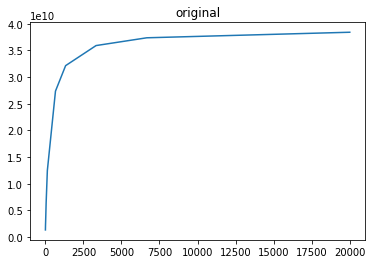

In [3]:
flow_size=[0, 6, 13, 19, 33, 53, 133, 667, 1333, 3333, 6667, 20000, float('inf')]

normalize_lists = loadNormalizeList('/home/pg_ga/lining/Gearbox/automatic/flowBenchmark/', flow_size[1:-1])
plt.plot(normalize_lists[0], normalize_lists[1])
plt.title("original")
plt.show()

In [3]:
FCT_analysis_normalize = FCT("/home/pg_ga/lining/Gearbox/automatic/BDP/", \
                   "Topology-incast-singlenode-large-number-8-BDP.tcl",\
                   200, \
                   [.1, .2, .3, .4, .5, .6, .7, .8, .9, .95], \
                   ["DropTail", "AFQ10UlimPL", "AFQ10PL", "AFQ100PL", "AFQ1000PL", "HRCCPL"],\
                   normalize_lists)

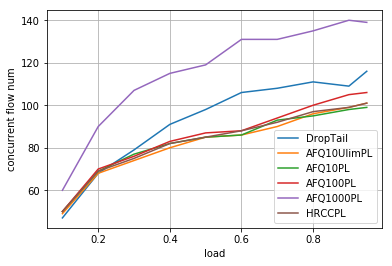

In [4]:
algs=["DropTail", "AFQ10UlimPL", "AFQ10PL", "AFQ100PL", "AFQ1000PL", "HRCCPL"]
loads=[.1, .2, .3, .4, .5, .6, .7, .8, .9, .95]
FCT_analysis_normalize.overlap_num(algs, loads)

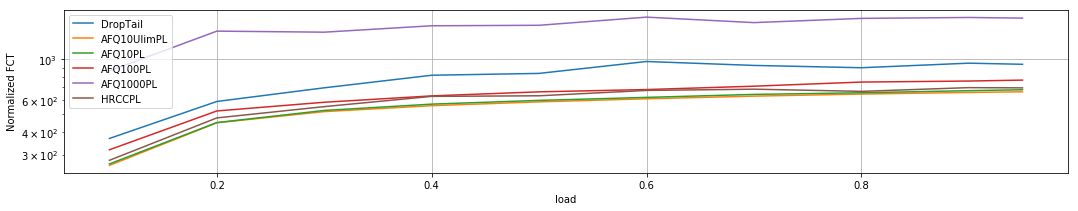

In [6]:
FCT_analysis_normalize.plotting_mean_FCT()

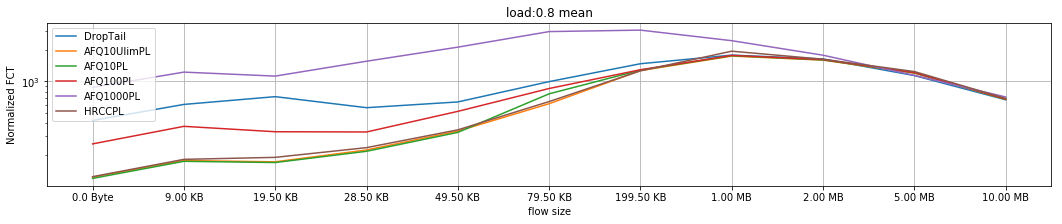

In [7]:
FCT_analysis_normalize.plot_Mean_FCT_fix_load(
    ["DropTail", "AFQ10UlimPL", "AFQ10PL", "AFQ100PL", "AFQ1000PL", "HRCCPL"], 0.8, flow_size)

## DropTail

In [5]:
df_out_tr_6 = read_out_tr("/home/pg_ga/lining/Gearbox/automatic/BDP/", \
                              "DropTail_flow_200_0.8_Topology-incast-singlenode-large-number-8-BDP.tcl_out.tr")
df = df_out_tr_6
df_out = df.loc[df["events"].isin(["r"])]
df_out = df_out.loc[df_out["pkt_type"].isin(["tcp"])]
#df_out = df_out.loc[df_out["fid"].isin([180])]
df_out = df_out.loc[df_out["to_node"].isin([83])]
df_out = df_out[['time', 'pkt_size', 'fid']]
r_event_in_dst = df_out
r_event_in_dst['ts'] = r_event_in_dst['time'].apply(lambda x: pd.Timedelta(x,unit='s'))
grouped=r_event_in_dst.groupby('fid')
shortTh = grouped[['ts', 'pkt_size']].resample(str(12) + 'U', on='ts').sum()

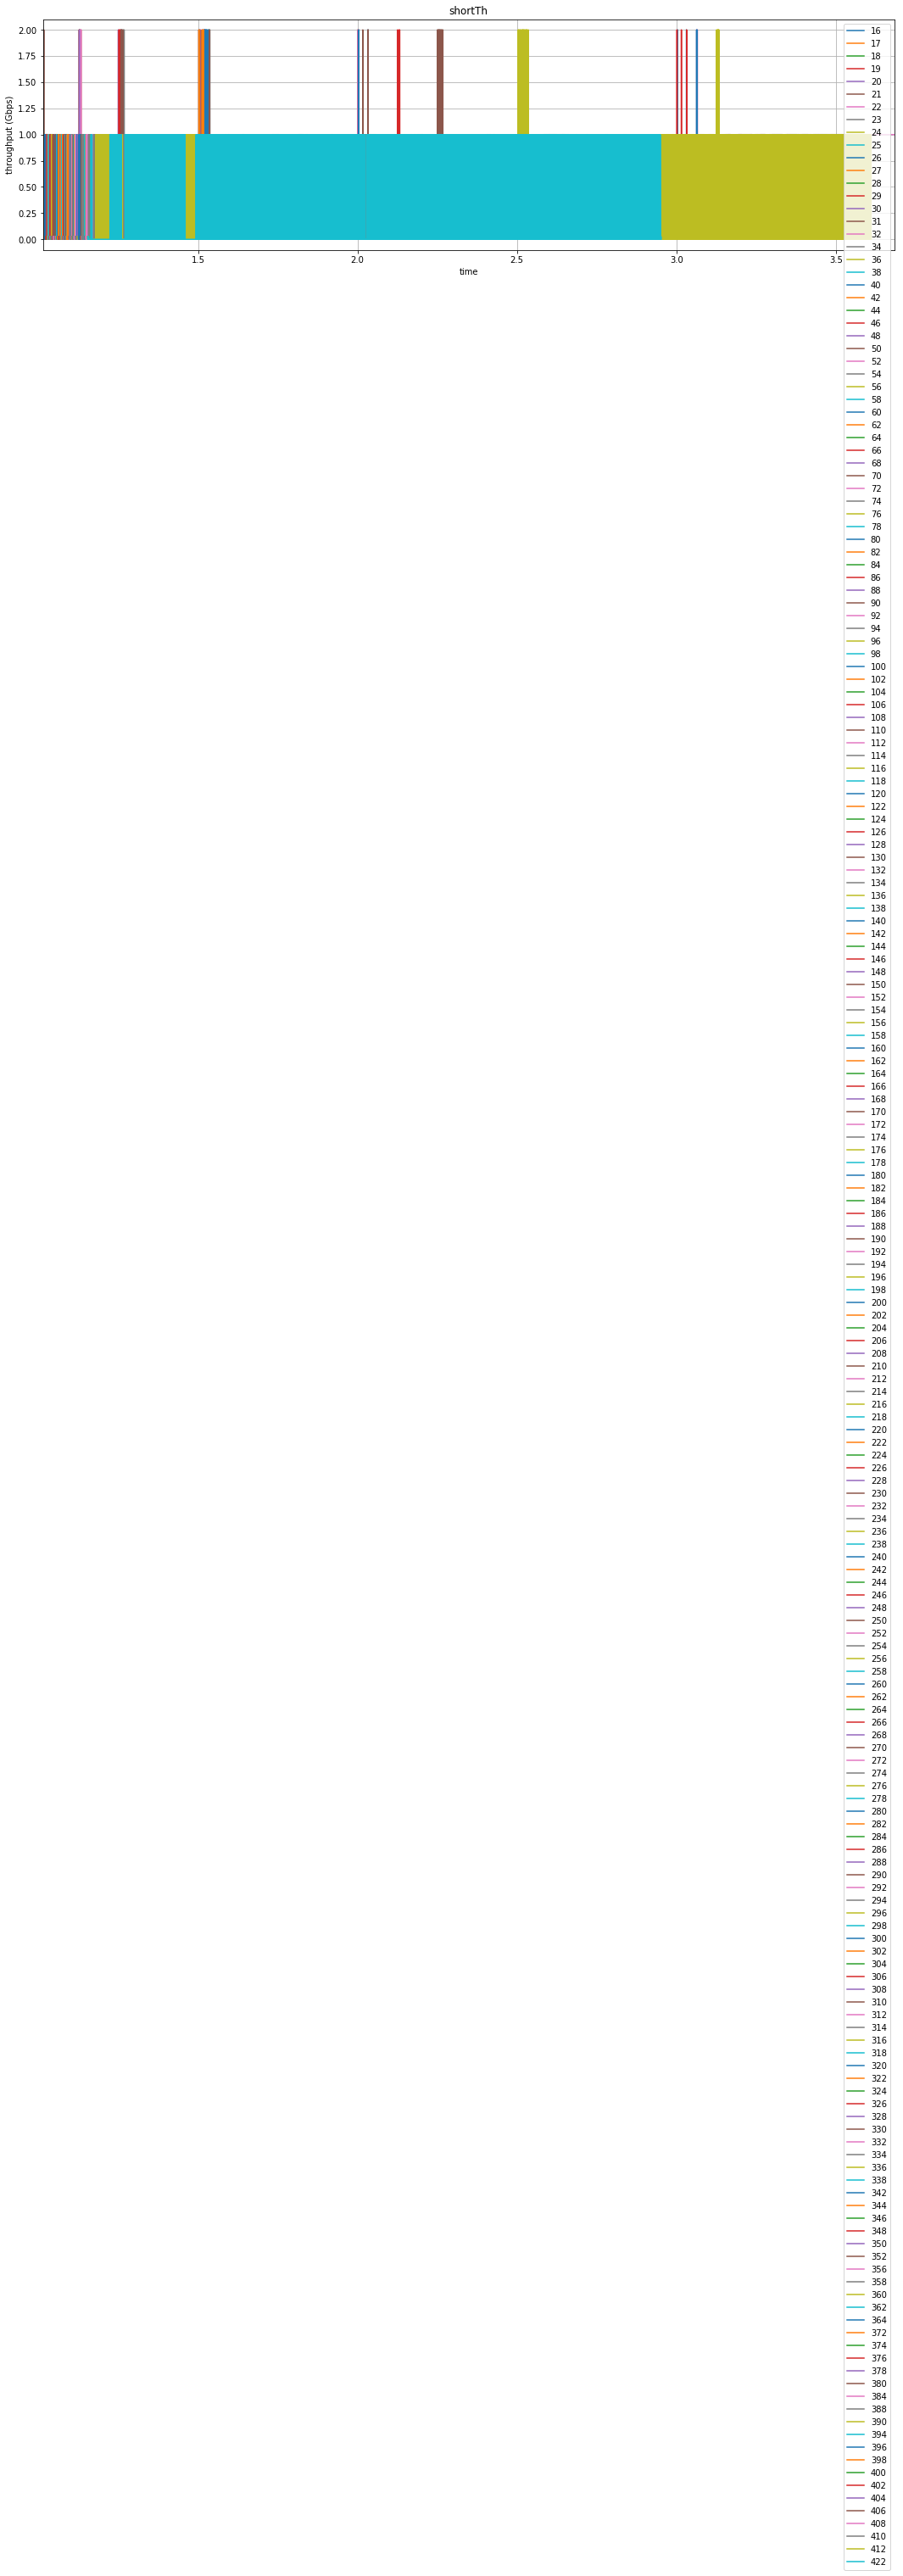

In [6]:
shortTh['throughtput'] = shortTh['pkt_size']*8 / (12 * 1e-6) / 1000 / 1000 / 1000
res = shortTh[['throughtput']]
ax=None
cnt = 0
fids=[]
for fid, _ in grouped:
    res_fid = res.loc[fid]
    res_fid['time'] = res_fid.index / timedelta(seconds=1)
    ax=res_fid.plot(x='time', y='throughtput', ax=ax, figsize=(18,5), kind='line', legend=True, title='shortTh', grid=True)
    fids.append(fid)
plt.xlabel('time')
plt.ylabel('throughput (Gbps)')
plt.legend(fids)
plt.show()

In [7]:
df = df_out_tr_6
df_out = df.loc[df["pkt_type"].isin(["tcp"])]
df_out = df_out.loc[df_out["fid"].isin([180])]
print("from", df_out.from_node.unique())
print("to", df_out.to_node.unique())

from [30 13  1 10  7 19]
to [13  1 10  7 19 83]


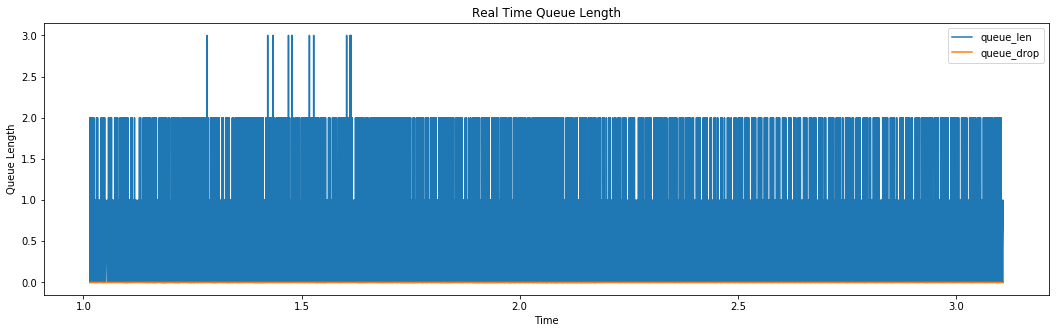

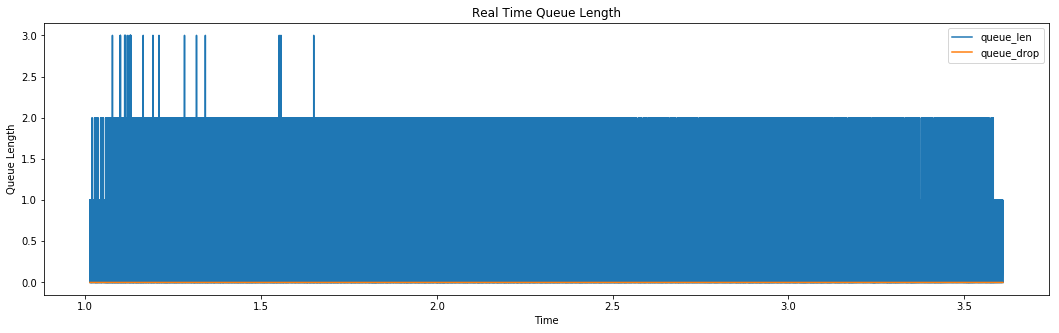

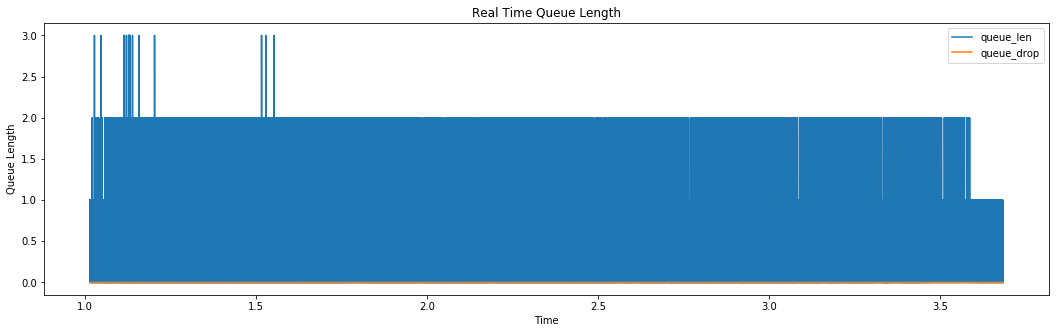

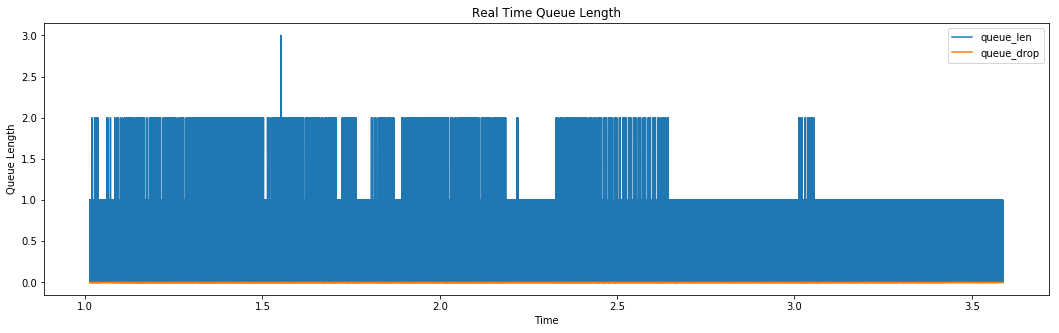

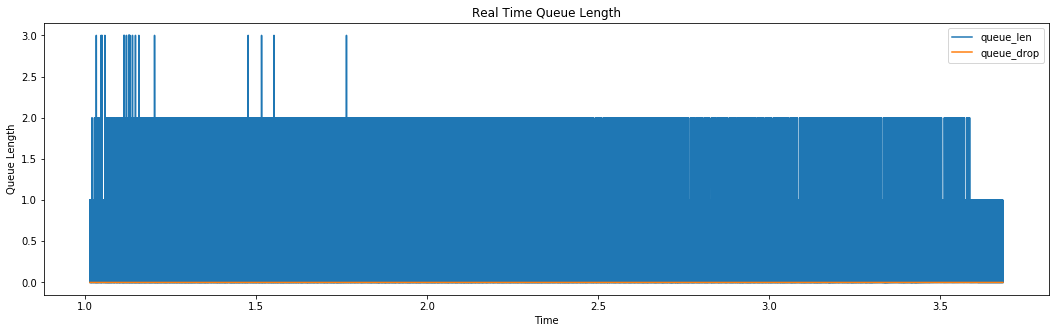

In [ ]:
for switch in df_out.from_node.unique():
    cal_queue_len(df_out_tr_6, switch)

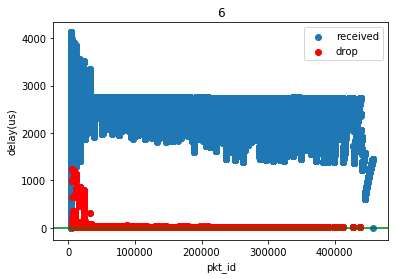

In [4]:
Delay_6 = DelayAnalysis("/home/pg_ga/lining/Gearbox/automatic/BDP/", \
                        "DropTail_flow_200_0.8_Topology-incast-singlenode-large-number-8-BDP.tcl_out.tr")
Delay_6.print_pkt_delay(12, '6')

## AFQ1000PL

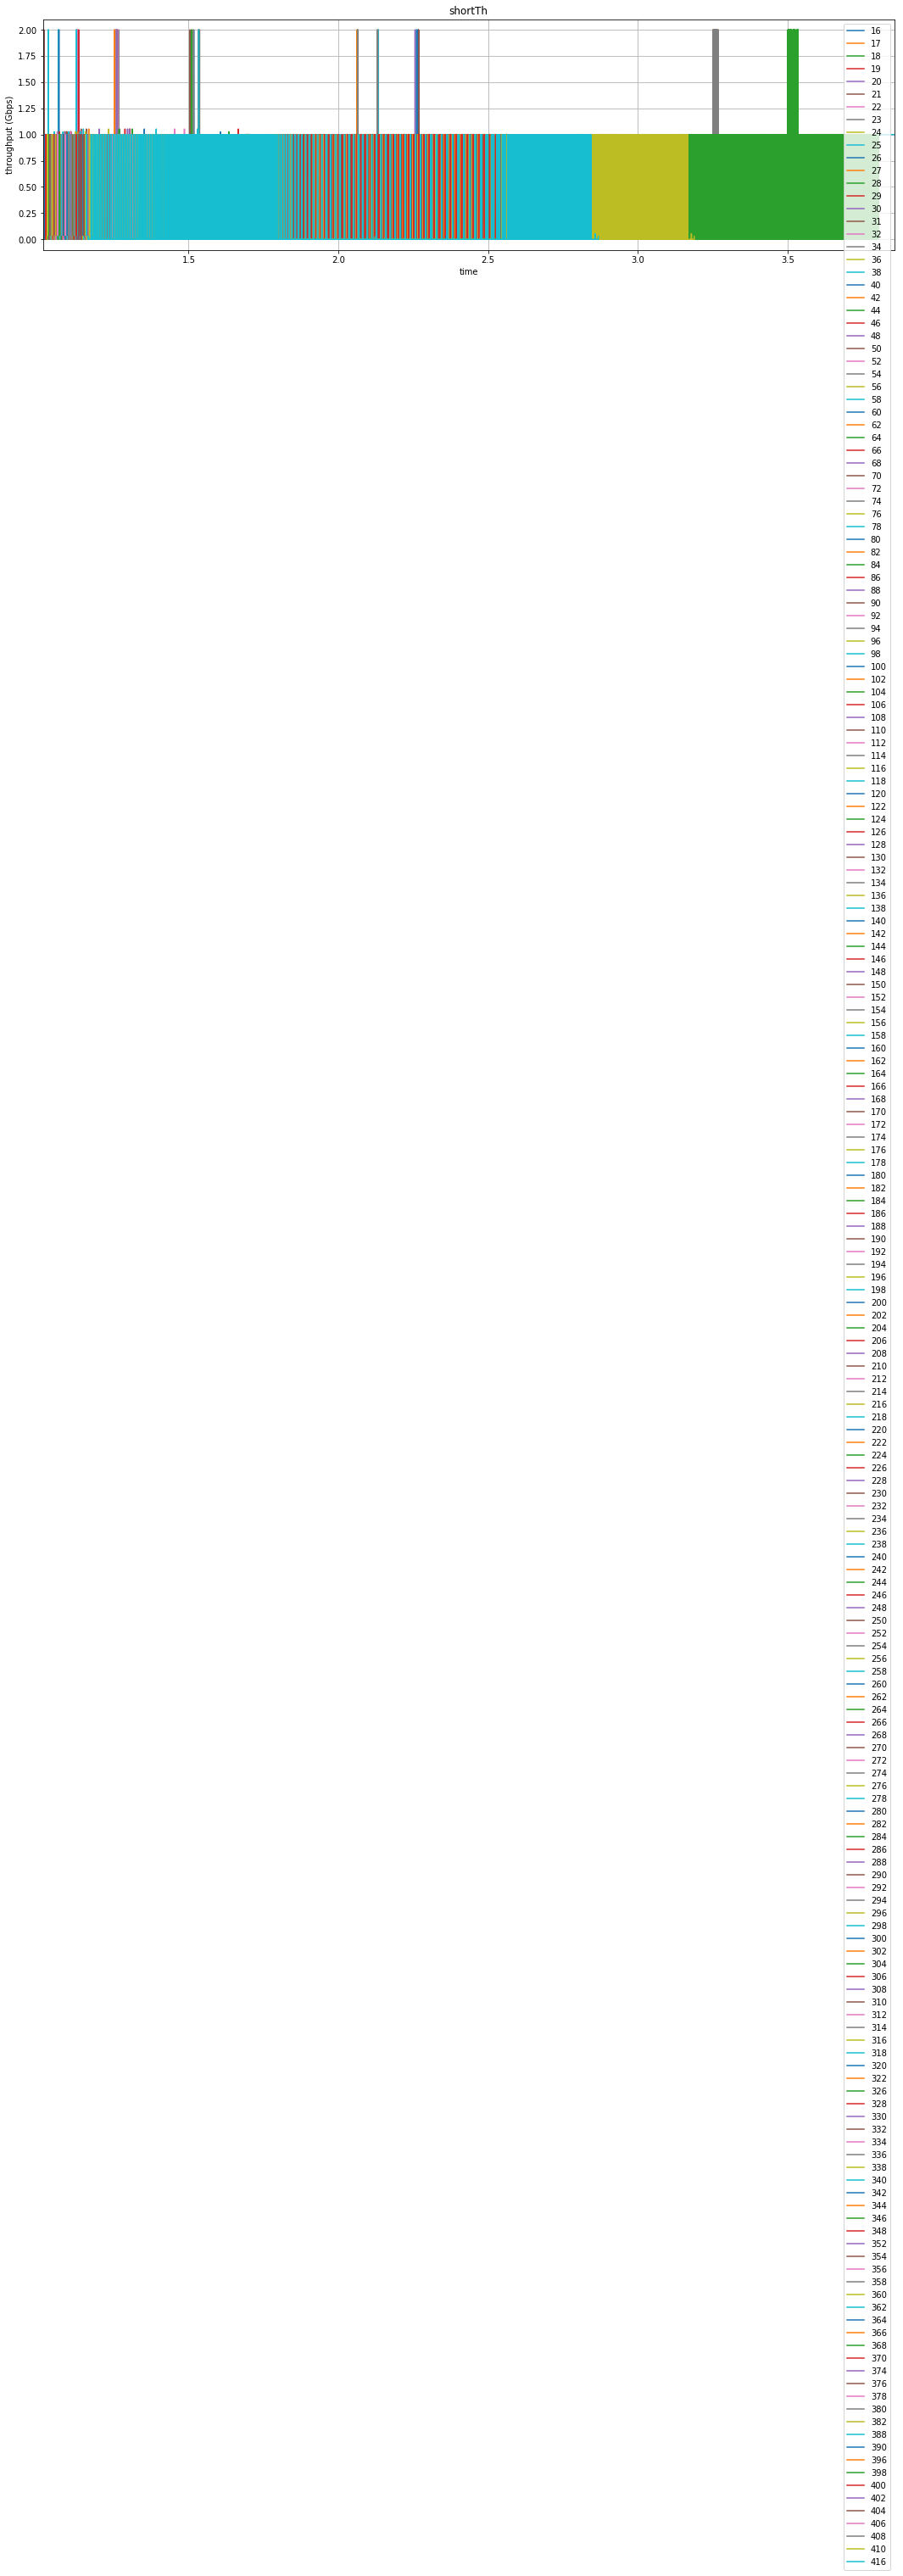

In [5]:
df_out_tr_6 = read_out_tr("/home/pg_ga/lining/Gearbox/automatic/BDP/", \
                              "AFQ1000PL_flow_200_0.8_Topology-incast-singlenode-large-number-8-BDP.tcl_out.tr")
df = df_out_tr_6
df_out = df.loc[df["events"].isin(["r"])]
df_out = df_out.loc[df_out["pkt_type"].isin(["tcp"])]
df_out = df_out.loc[df_out["to_node"].isin([83])]
df_out = df_out[['time', 'pkt_size', 'fid']]
r_event_in_dst = df_out
r_event_in_dst['ts'] = r_event_in_dst['time'].apply(lambda x: pd.Timedelta(x,unit='s'))
grouped=r_event_in_dst.groupby('fid')
shortTh = grouped[['ts', 'pkt_size']].resample(str(12) + 'U', on='ts').sum()
shortTh['throughtput'] = shortTh['pkt_size']*8 / (12 * 1e-6) / 1000 / 1000 / 1000
res = shortTh[['throughtput']]
ax=None
cnt = 0
fids=[]
for fid, _ in grouped:
    res_fid = res.loc[fid]
    res_fid['time'] = res_fid.index / timedelta(seconds=1)
    ax=res_fid.plot(x='time', y='throughtput', ax=ax, figsize=(18,5), kind='line', legend=True, title='shortTh', grid=True)
    fids.append(fid)
plt.xlabel('time')
plt.ylabel('throughput (Gbps)')
plt.legend(fids)
plt.show()

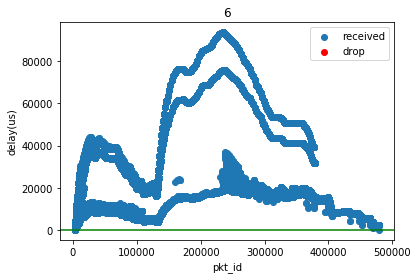

In [6]:
Delay_6 = DelayAnalysis("/home/pg_ga/lining/Gearbox/automatic/BDP/", \
                        "AFQ1000PL_flow_200_0.8_Topology-incast-singlenode-large-number-8-BDP.tcl_out.tr")
Delay_6.print_pkt_delay(12, '6')

from [27 12  1 11  7 19]
to [12  1 11  7 19 83]


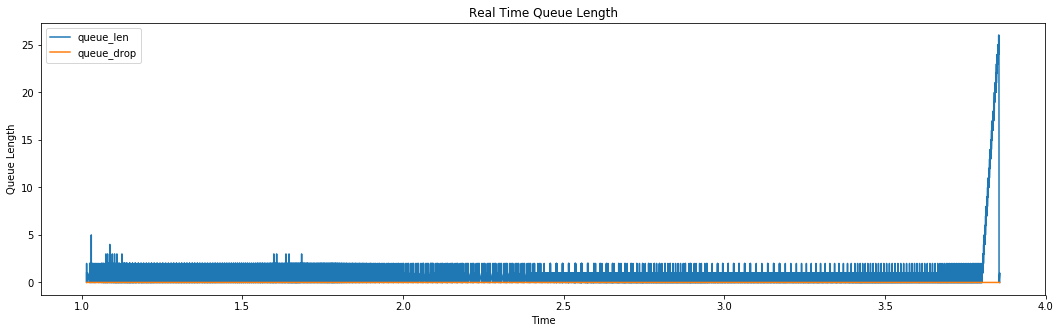

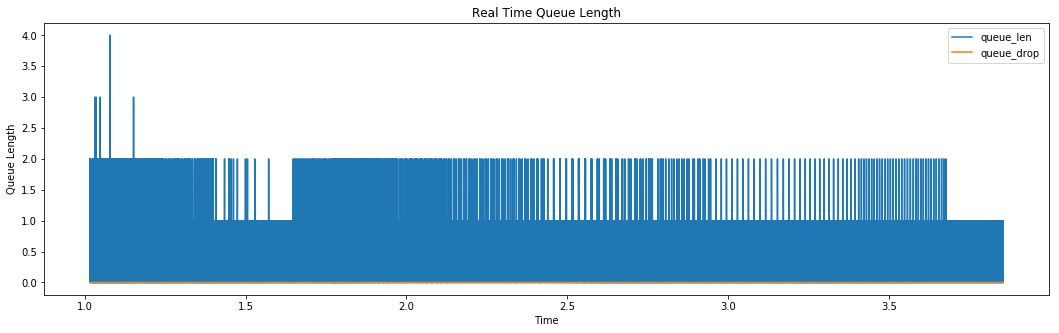

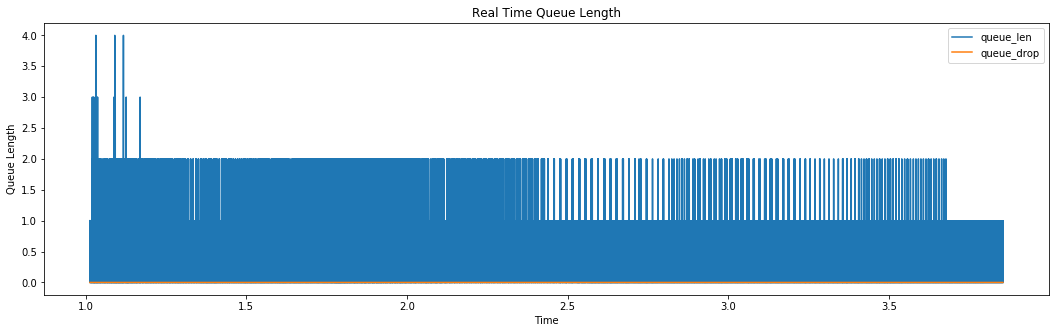

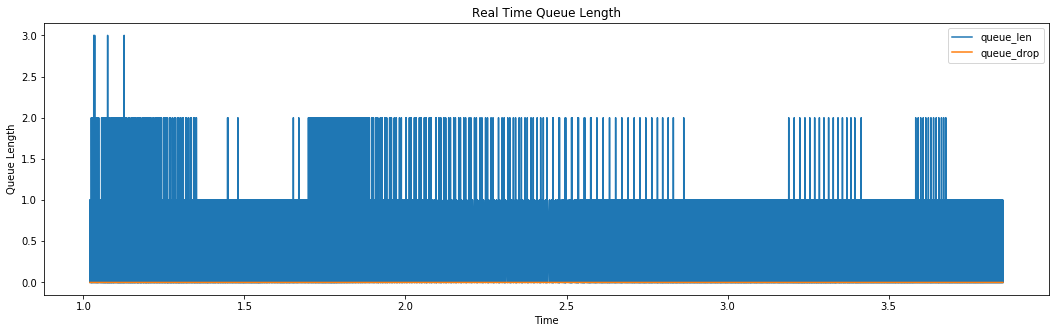

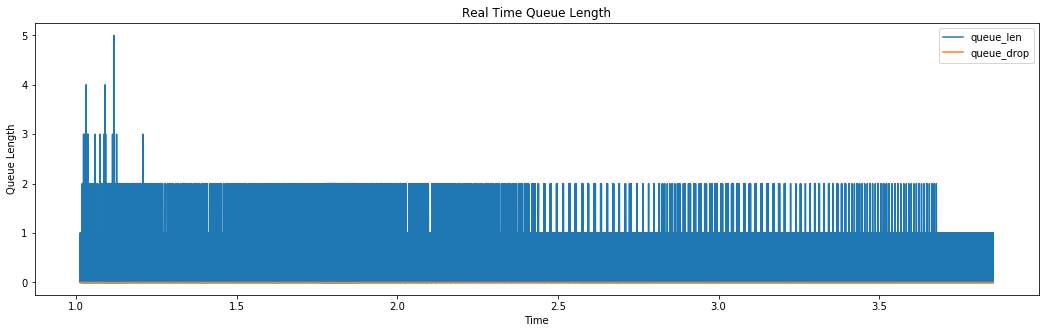

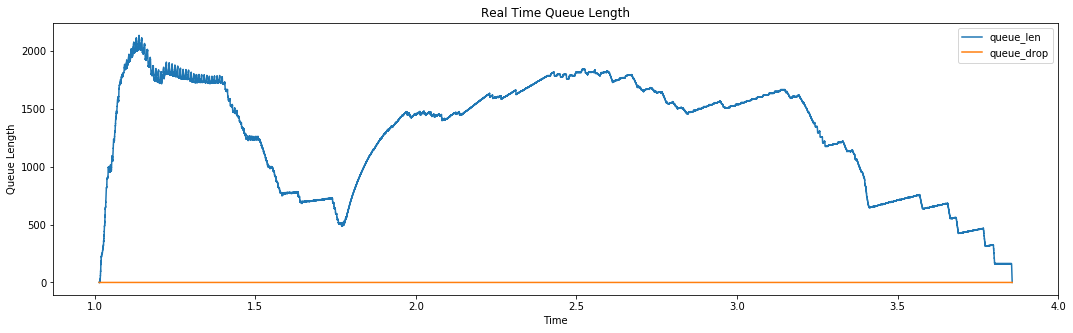

In [7]:
df_out_tr_6 = read_out_tr("/home/pg_ga/lining/Gearbox/automatic/BDP/", \
                              "AFQ1000PL_flow_200_0.8_Topology-incast-singlenode-large-number-8-BDP.tcl_out.tr")
df = df_out_tr_6
df_out = df.loc[df["pkt_type"].isin(["tcp"])]
df_out = df_out.loc[df_out["fid"].isin([180])]
print("from", df_out.from_node.unique())
print("to", df_out.to_node.unique())
for switch in df_out.from_node.unique():
    cal_queue_len(df_out_tr_6, switch)

## HRCCPL

In [8]:
df_out_tr_6 = read_out_tr("/home/pg_ga/lining/Gearbox/automatic/BDP/", \
                              "HRCCPL_flow_200_0.8_Topology-incast-singlenode-large-number-8-BDP.tcl_out.tr")
df = df_out_tr_6
df_out = df.loc[df["events"].isin(["r"])]
df_out = df_out.loc[df_out["pkt_type"].isin(["tcp"])]
df_out = df_out.loc[df_out["to_node"].isin([83])]
df_out = df_out[['time', 'pkt_size', 'fid']]
r_event_in_dst = df_out
r_event_in_dst['ts'] = r_event_in_dst['time'].apply(lambda x: pd.Timedelta(x,unit='s'))
grouped=r_event_in_dst.groupby('fid')
shortTh = grouped[['ts', 'pkt_size']].resample(str(12) + 'U', on='ts').sum()
shortTh['throughtput'] = shortTh['pkt_size']*8 / (12 * 1e-6) / 1000 / 1000 / 1000
res = shortTh[['throughtput']]

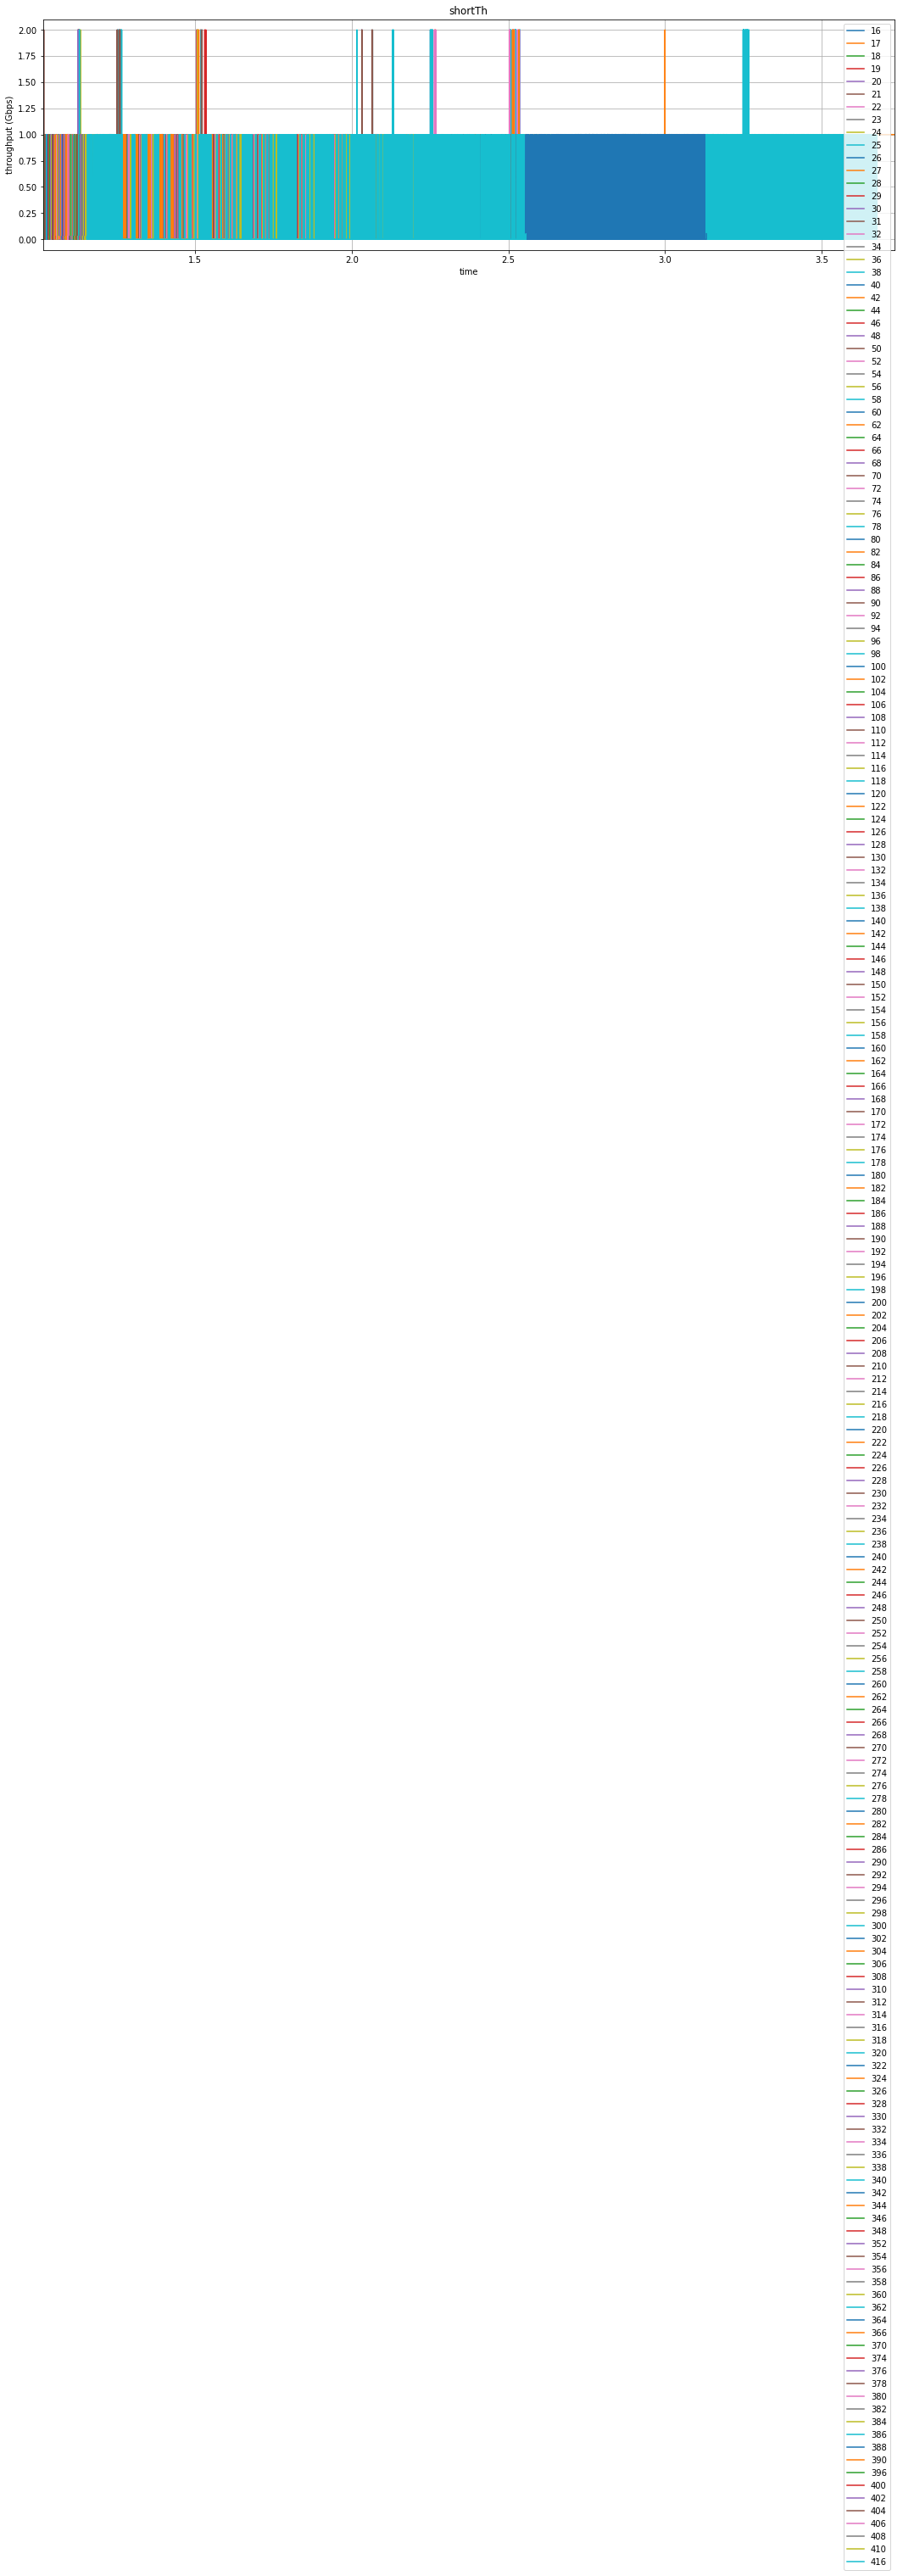

In [9]:
ax=None
cnt = 0
fids=[]
for fid, _ in grouped:
    res_fid = res.loc[fid]
    res_fid['time'] = res_fid.index / timedelta(seconds=1)
    ax=res_fid.plot(x='time', y='throughtput', ax=ax, figsize=(18,5), kind='line', legend=True, title='shortTh', grid=True)
    fids.append(fid)
plt.xlabel('time')
plt.ylabel('throughput (Gbps)')
plt.legend(fids)
plt.show()

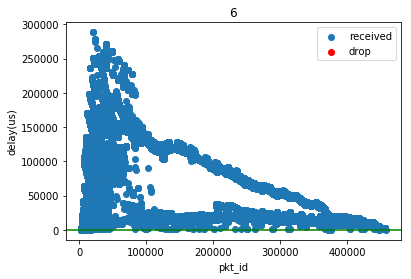

In [10]:
Delay_6 = DelayAnalysis("/home/pg_ga/lining/Gearbox/automatic/BDP/", \
                        "HRCCPL_flow_200_0.8_Topology-incast-singlenode-large-number-8-BDP.tcl_out.tr")
Delay_6.print_pkt_delay(12, '6')

from [31 13  0  8  6 19]
to [13  0  8  6 19 83]


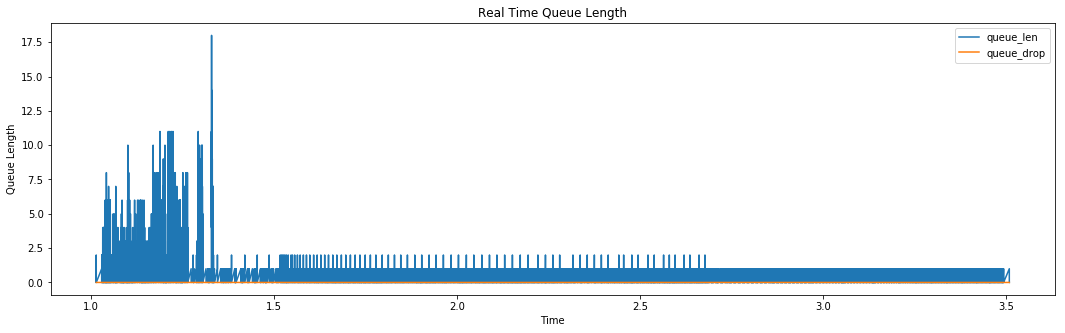

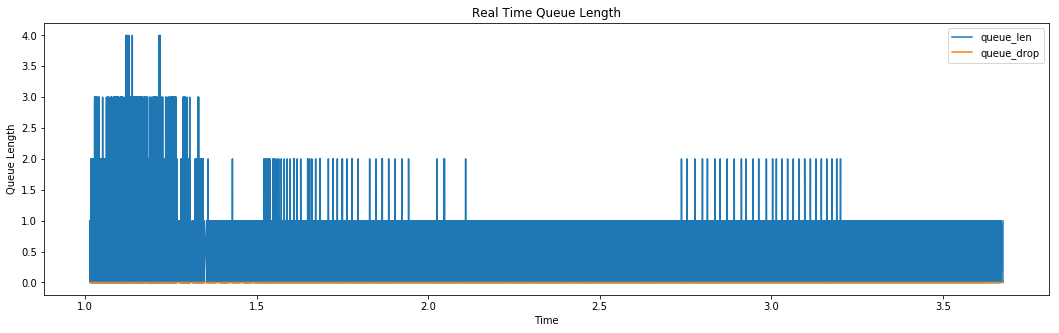

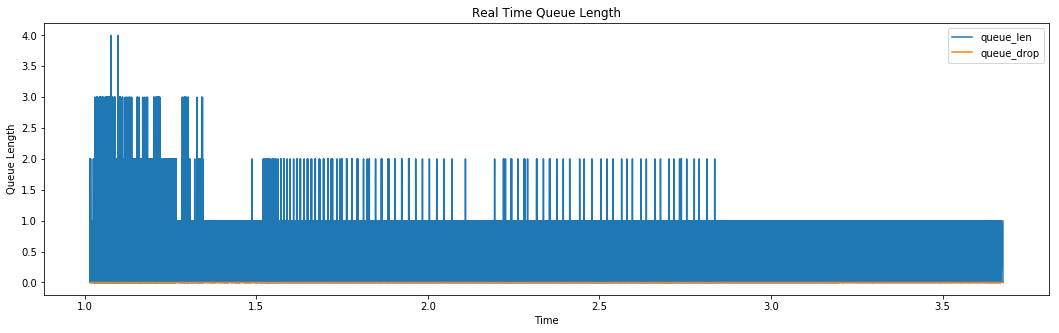

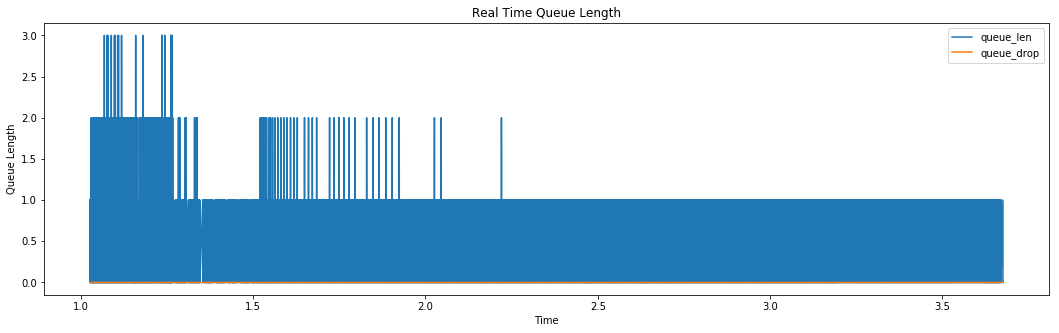

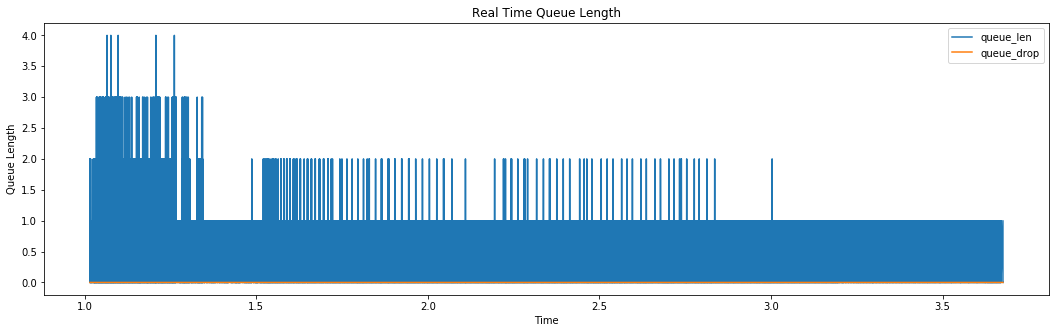

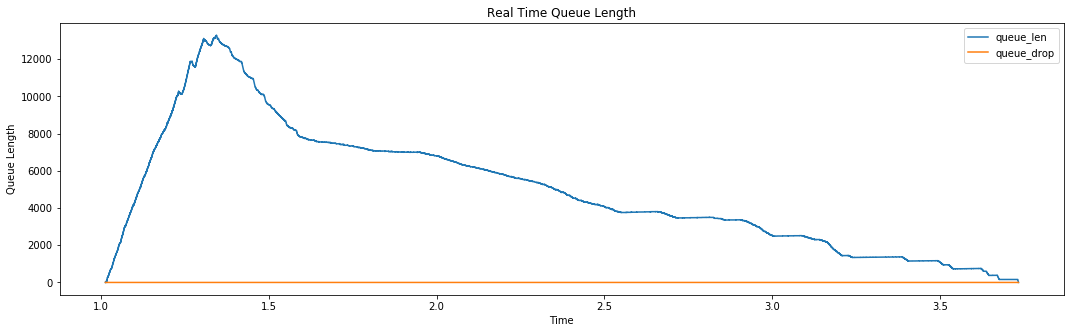

In [11]:
df_out_tr_6 = read_out_tr("/home/pg_ga/lining/Gearbox/automatic/BDP/", \
                              "HRCCPL_flow_200_0.8_Topology-incast-singlenode-large-number-8-BDP.tcl_out.tr")
df = df_out_tr_6
df_out = df.loc[df["pkt_type"].isin(["tcp"])]
df_out = df_out.loc[df_out["fid"].isin([180])]
print("from", df_out.from_node.unique())
print("to", df_out.to_node.unique())
for switch in df_out.from_node.unique():
    cal_queue_len(df_out_tr_6, switch)